In [169]:
# 3 frames
input=[["0 0.1 0.1 0.2 0.2",
 "1 0.5 0.5 0.6 0.6"],
["0 0.2 0.2 0.3 0.3",
 "1 0.4 0.4 0.5 0.5",
 "3 0.3 0.3 0.4 0.4"],
["0 0.8 0.9 0.2 0.3",
 "1 0.3 0.3 0.4 0.4"]]

In [170]:
def center_point(x_l, x_r, y_t, y_b):
  x = (x_r - x_l) * 0.5 + x_l
  y = (y_t - y_b) * 0.5 + y_b
  return (x, y)

In [181]:
import matplotlib.pyplot as plt
def print_graph(G):
  # Print the graph
  print("Graph nodes:", G.nodes())
  print("Graph edges:", G.edges(data=True))
  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')

  # Draw edge labels
  #edge_labels = nx.get_edge_attributes(G, 'edge_feature')
  edge_labels = {(u, v): G[u][v]['edge_feature'] for u, v in G.edges() if 'edge_feature' in G[u][v]}

  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  plt.show()

Graph nodes: ['0', '1']
Graph edges: []


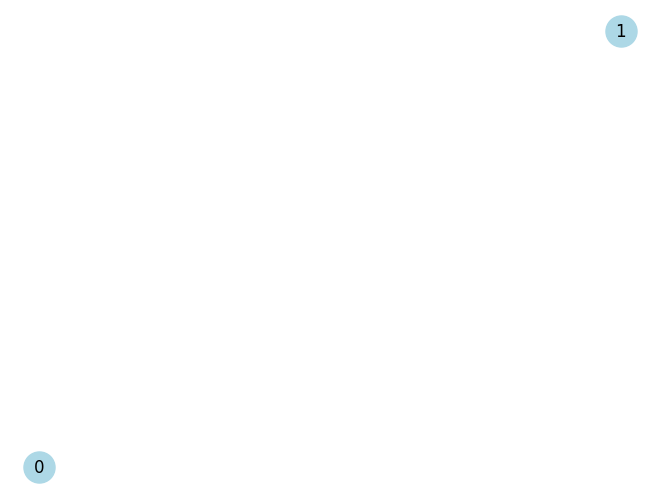

Graph nodes: ['0', '1', '3']
Graph edges: []


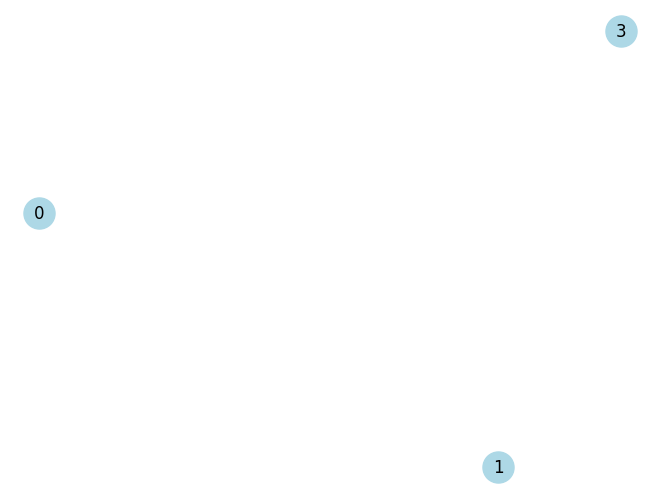

Graph nodes: ['0', '1']
Graph edges: []


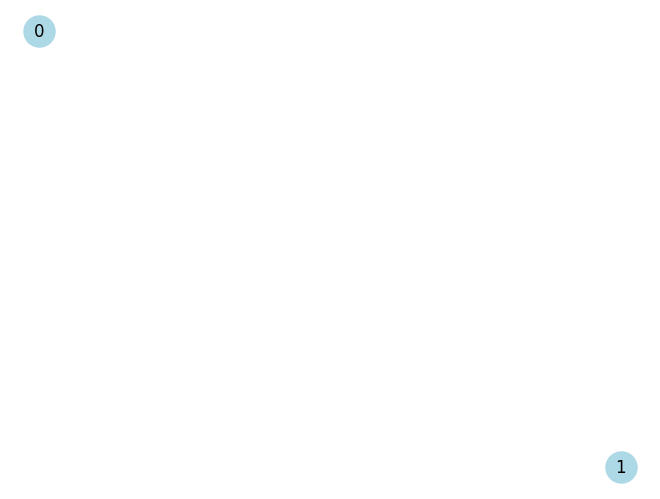

In [182]:
import networkx as nx

frames= []
for frame in input:
  G = nx.DiGraph()
  for i in frame:
    temp=i.split(" ")
    xy=(center_point(float(temp[1]), float(temp[2]), float(temp[3]), float(temp[4])))
    G.add_node(temp[0], xy=xy)

  frames.append(G)

for i in frames:
  print_graph(i)

Graph nodes: ['0', '1']
Graph edges: [('0', '1', {'edge_feature': 3, 'edge_feature_str': 'Top-Left'}), ('1', '0', {'edge_feature': 2, 'edge_feature_str': 'Bottom-Right'})]


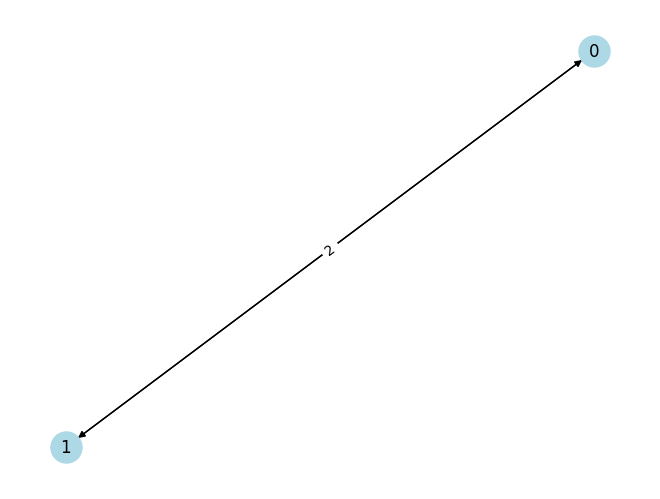

Graph nodes: ['0', '1', '3']
Graph edges: [('0', '1', {'edge_feature': 3, 'edge_feature_str': 'Top-Left'}), ('0', '3', {'edge_feature': 3, 'edge_feature_str': 'Top-Left'}), ('1', '0', {'edge_feature': 2, 'edge_feature_str': 'Bottom-Right'}), ('1', '3', {'edge_feature': 2, 'edge_feature_str': 'Bottom-Right'}), ('3', '0', {'edge_feature': 2, 'edge_feature_str': 'Bottom-Right'}), ('3', '1', {'edge_feature': 3, 'edge_feature_str': 'Top-Left'})]


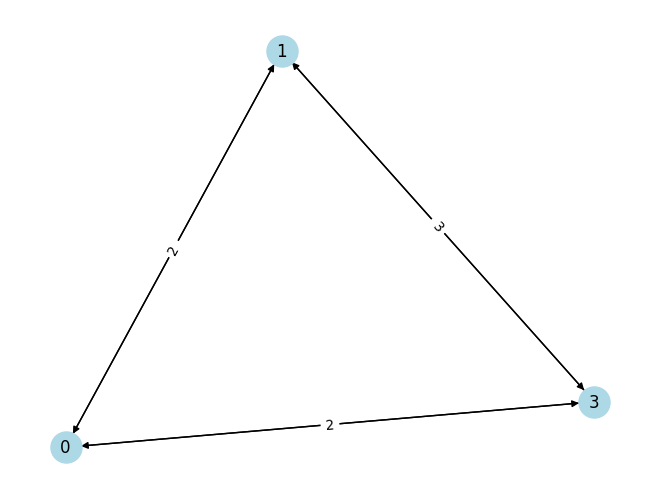

Graph nodes: ['0', '1']
Graph edges: [('0', '1', {'edge_feature': 4, 'edge_feature_str': 'Top-Right'}), ('1', '0', {'edge_feature': 1, 'edge_feature_str': 'Bottom-Left'})]


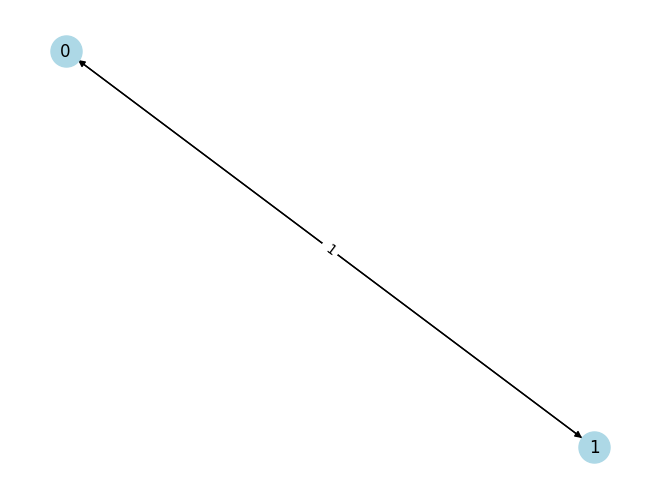

In [183]:
for G in frames:
  for obj1 in G.nodes():
    for obj2 in G.nodes():
      if obj1 != obj2:
        obj1_x , obj1_y = G.nodes[obj1]["xy"][0] , G.nodes[obj1]["xy"][1]
        obj2_x , obj2_y = G.nodes[obj2]["xy"][0] , G.nodes[obj2]["xy"][1]

        if obj1_x >= obj2_x and obj1_y >= obj2_y:
          edge_feature =2 # bottom-right
          edge_feature_str = "Bottom-Right" # bottom-right
        elif obj1_x < obj2_x and obj1_y >= obj2_y:
          edge_feature =1
          edge_feature_str = "Bottom-Left" # bottom-right
        elif obj1_x < obj2_x and obj1_y < obj2_y:
          edge_feature =3
          edge_feature_str = "Top-Left" # bottom-right
        elif obj1_x >= obj2_x and obj1_y < obj2_y:
          edge_feature =4
          edge_feature_str = "Top-Right" # bottom-right

        G.add_edge(obj1, obj2, edge_feature=edge_feature, edge_feature_str=edge_feature_str)

for i in frames:
  print_graph(i)

In [184]:
# 0 moving left to right
# 1 moving right to left
# 2 moving forward
# 3 moving backward
# 4 no change
# 5 self edge
# 6 moving foward * (not included)
# 7 moving backward * (not included)

def comp(prev, curr):
  if(prev == 0 and curr == 0):
    return 5  # 5 self edge
  elif(prev == 1 and curr == 2):
    return 0
  elif(prev == 1 and curr == 3):
    return 2
  elif(prev == 1 and curr == 4):
    return 6 # 6 moving foward * (not included)
  elif(prev == 2 and curr == 1):
    return 1
  elif(prev == 2 and curr == 3):
    return 6 # 6 moving foward * (not included)
  elif(prev == 2 and curr == 4):
    return 2
  elif(prev == 3 and curr == 1):
    return 3
  elif(prev == 3 and curr == 2):
    return 7 # 7 moving backward * (not included)
  elif(prev == 3 and curr == 4):
    return 0
  elif(prev == 4 and curr == 1):
    return 7 # 7 moving backward * (not included)
  elif(prev == 4 and curr == 2):
    return 3
  elif(prev == 4 and curr == 3):
    return 1
  elif(prev == curr):
    return 4
  else:
    raise TypeError("Fucntion Comp Failed!!")

In [185]:
Iframes=[]
#pop IG with nodes from all frames
IG = nx.DiGraph()
for G in frames:
  for node in G.nodes():
    if not node in IG.nodes():IG.add_node(node)
print(IG.number_of_nodes())

3


In [186]:
#create a list with all edges in all frames
edge_list=[]
for G in frames:
  for edge in G.edges():
    if not edge in edge_list:
      edge_list.append(edge)
print(edge_list)

[('0', '1'), ('1', '0'), ('0', '3'), ('1', '3'), ('3', '0'), ('3', '1')]


Graph nodes: ['0', '1', '3']
Graph edges: [('0', '1', {'edge_feature': 0}), ('1', '0', {'edge_feature': 1})]


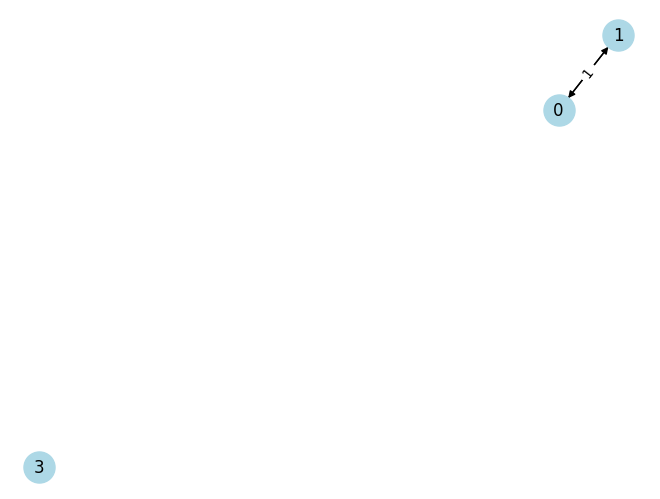

In [187]:
#Create interaction graph
for edge in edge_list:
  edge_feature=None
  for n, G in enumerate(frames):
    if n+1==len(frames):break
    if not edge in G.edges() or not edge in frames[n+1].edges(): continue

    obj1, obj2 = G.edges()[(edge)], frames[n+1].edges()[(edge)]
    edge_feature=comp(obj1["edge_feature"], obj2["edge_feature"])
    #IG.add_edge(*edge, edge_feature=edge_feature) #priorites the last interaction #could put bool counter here to only add edge once if it found any but it looks uglier
  if (edge_feature!=None):
    IG.add_edge(*edge, edge_feature=edge_feature)

print_graph(IG)